# Unsupervised Learning

Unsupervised learning describes a collection of techniques that attempt to find structure in data.

Examples include:

* __Clustering__: attempts to divide data into groups based off a definition of similarity, such as distance in univariate or multidimensional space.
* __Dimensionality Reduction__: Attempts to encode high dimensional data (e.g. tens of thousands of variables) into a smaller set of variables

This is in contrast to supervised learning, where, given an input $x$ and output $y$ we attempt to learn a function $f(x)$ = $y$, where $x$ and $y$ can be scalars (numbers) , vectors (lines of numbers), or matrices (2D array of numbers). In unsupervised learning, we are only given $x$ and no output, and the goal is to find structure in a collection of data points.

Here, we'll go over 2 Techniques: dimensionality reduction and clustering.

## Dimensionality Reduction

Often we can deal with datasets that exist in high dimensional spaces (e.g $d$ = 10,000, where $d$ is the number of variables in the data). The breast cancer dataset we shall explore has 30 dimensions for 'input data' features  plus 1 for 'target' label (i.e. whether or not the example is benign or malignant). Not only is it impossible for people to visualize data beyond 3 dimensions, but when we use supervised learning techniques such as K-nearest neighbor classification or an unsupervised method such as K-means clustering, the assumption that similar datapoints are closer to one another than dissimilar points in terms of Euclidean distance is violated<sup>1</sup>. The violation of this assumption is called the _curse of dimensionality_. A further discussion of this topic can be found [here](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html).

What dimensionality reduction can accomplish is to pick up neat properties of your data in high dimensional space and express them in a much lower dimensional space. This allows an automated fashion of finding those neat properties while also expressing data in a way better suited for downstream applications such as clustering or classification. Examples include Princpal Components Analysis (PCA), Factor Analysis, Locally Linear Embedding, and more. Today we'll go over PCA.

1. For 2D and 3D data, Euclidean distance is just the length of a line drawn between two points $p$ and $q$ if you plotted them in 2 or 3D, and its formula is $\sqrt{\sum_{d=1}^D (p_d - q_d)^2} $, where $d$ denotes an individual variable and $D$ is the total number of variables. Here's an example in 2D from Wikipedia:

![Euclidean Distance in 2D (Wikipedia)](https://upload.wikimedia.org/wikipedia/commons/5/55/Euclidean_distance_2d.svg)

### Overview of PCA:

Without diving into linear algebra, what PCA tries to do at the end of the day is express the data as weighted sums of the data's variables.

The procedure is as follows:

1. Standard Normalize Data. Part of the reason we do this is so the procedure doesn't give too much weight to certain variables based on certain variables having a wider range of values.

    Formula is as follows: $b_{id} = (x_{id} - \bar{x_d})/\sigma_d$, where $i$ denotes sample, $d$ denotes variable,  $\bar{x_d}$ denotes mean for the variable among all $x_{id}$, and $\sigma_d$ denotes the standard deviation for variable d

2. calculate a variable $v_1$ = $\sum_{d=1}^{D} a_d b_d$ such that $Var[v_1]$ (variance of the new variable) is maximized, with the constraint that $\sum_{d=1}^{D} a_d^2$ = 1

3. repeat step 2, but subject to the constraint that the new variable, $v_2$ is uncorrelated with $v_1$, i.e correlation between the two variables = 0.

4. Repeat step 3, again and again, subject to the constraint that any new variable $v_k$ computed for iteration $l$ is not correlated with any variables $v_{k'}$ where $k' < k$ (i.e not correlated with any previously computed variables).

There's an upper limit on the amount of PCs that can be computed, but we're not discussing that today as it requires knowledge of linear algebra.

For a more in depth discussion of PCA, here's a reference you can look into:

* [Stanford Engineering Everywhere, CS229 PCA Notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes10.pdf)

Let's dive into the data!

### PCA on Breast Cancer Dataset



In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from ipywidgets import interact, fixed
from matplotlib import pyplot as plt
import seaborn
import pandas as pd

data = load_breast_cancer()

##### Data

The data we're using consists of attributes obtained from imaging data undergoing screening for breast cancer. Features correspond to geometric qualities of cell nuclei (objects that hold the DNA in a cell).

for more details, see (sklearn website)[https://scikit-learn.org/stable/datasets/index.html] and (original source)[https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)]

In [2]:
len(data.feature_names)

30

In [3]:
# dimensions of data: 569 examples x 30 features
data['data'].shape

(569, 30)

In [4]:
# Examine Data
breast_cancer_df = pd.DataFrame(data = data['data'], columns = data.feature_names)

In [5]:
# Columns 1-15 (0-14 in 0 based indexing)
breast_cancer_df.iloc[:, 0:15].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490


In [6]:
# Columns 16-30 (15-29 in 0 based indexing)
breast_cancer_df.iloc[:, 15:30].head()

,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
@interact
# Interactive Histogram, using interact decorator function from ipywidgets
def do_hist(var_name = data.feature_names, df = fixed(breast_cancer_df)):
    # Inputs:
    #       var_name: variable name. change variable name in menu to change variable displaed
    #       df = data.frame to use. this is fixed
    plt.hist(df[var_name].to_numpy())

interactive(children=(Dropdown(description='var_name', options=('mean radius', 'mean texture', 'mean perimeter…

Note that variables denote either continuous or count data. PCA will help us find correlated structure. However, we note that the data is not centered and scaled, and while the sklearn PCA workflow does automatic centering of data, it does not scale data such that it's standard normalized. let's scale and center it now.

In [8]:
data_scaled = preprocessing.scale(data['data'])
data_scaled_df = pd.DataFrame(data = data_scaled, columns = data.feature_names)

In [9]:
@interact
# Interactive Histogram, using interact decorator function from ipywidgets
def do_hist(var_name = data.feature_names, df = fixed(data_scaled_df)):
    # Inputs:
    #       var_name: variable name. change variable name in menu to change variable displaed
    #       df = data.frame to use. this is fixed
    plt.hist(df[var_name].to_numpy())

interactive(children=(Dropdown(description='var_name', options=('mean radius', 'mean texture', 'mean perimeter…

In [10]:
# check actual numerical values of variance. here we see that we have variance = 1 for 
np.var(data_scaled, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
# check actual numerical values of mean
np.mean(data_scaled, axis = 0)

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

Variances are all = 1, means are all very close to 0. The latter result is likely a consequencec of numerical stability issues with very small numbers

##### Labels (Not Used Here for PCA)

In [12]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
np.unique(data['target'])

array([0, 1])

In [14]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Labels here just denote a known class of the object for a category, in this case whether or not a case is malignant or benign. Somewhat counterintuitively, they've chosen to label benign samples as 1, malignant samples as 0 (this was spot checked against source dataset)

##### PCA of Data

In [15]:
from sklearn import decomposition
# setup object
pca_obj = decomposition.PCA()
# fit PCA, i.e. perform PCA algorithm on data
pca_obj.fit(data_scaled)

PCA()

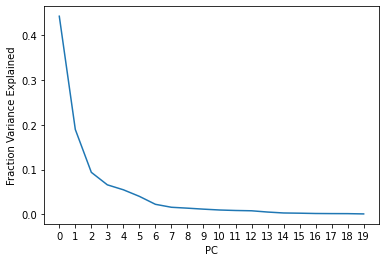

In [16]:
# explained variance per PC
pcs_plot = np.arange(0,20)
plt.plot(pcs_plot, pca_obj.explained_variance_ratio_[pcs_plot])
plt.xticks(pcs_plot)
plt.xlabel('PC')
plt.ylabel('Fraction Variance Explained')
plt.show()

In [17]:
pca_obj.explained_variance_ratio_[pcs_plot]

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
       0.00979719, 0.00870538, 0.00804525, 0.00523366, 0.00313783,
       0.00266209, 0.00197997, 0.00175396, 0.00164925, 0.00103865])

Variance explained = variance of PC divided by sum of all variances across all input variables. Note that with 0 indexing, PC 0 is actually the first PC computed. it explains about 45% of variance in the data. PC 1 explains about 20%,a and PC 2 10%, for a total of about 72% of variance in the data. For the sake of simplicity and time, we'll just look at PCs 0 through 2.

We can look at which features are important for each PC.

<AxesSubplot:>

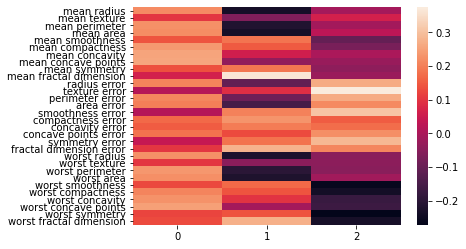

In [18]:
# get loadings for PC, i.e. association of input features with each PC. Do for PC0, PC1, PC2
loadings_mat = pca_obj.components_[0:3, :]
# 3 components x 30 features
loadings_mat.shape

loadings_df = pd.DataFrame(data = np.transpose(loadings_mat), 
                           index = data.feature_names, 
                           columns = np.arange(0,3).astype('str'))
loadings_df.shape
seaborn.heatmap(loadings_df, xticklabels = True, yticklabels = True)

In [19]:
# features ranked by association with PC 0
loadings_df.sort_values(by = '0', ascending = False).iloc[:, np.arange(0,1)]

,0
mean concave points,0.260854
mean concavity,0.258400
worst concave points,0.250886
mean compactness,0.239285
worst perimeter,0.236640
worst concavity,0.228768
worst radius,0.227997
mean perimeter,0.227537
worst area,0.224871
mean area,0.220995


In [20]:
# features ranked by association with PC 1
loadings_df.sort_values(by = '1', ascending = False).iloc[:, np.arange(1,2)]

,1
mean fractal dimension,0.366575
fractal dimension error,0.280092
worst fractal dimension,0.275339
compactness error,0.232716
smoothness error,0.204430
concavity error,0.197207
mean symmetry,0.190349
mean smoothness,0.186113
symmetry error,0.183848
worst smoothness,0.172304


In [21]:
# features ranked by association with PC 2
loadings_df.sort_values(by = '2', ascending = False).iloc[:, np.arange(2,3)]

,2
texture error,0.374634
smoothness error,0.308839
symmetry error,0.288584
radius error,0.268481
perimeter error,0.266645
concave points error,0.224658
area error,0.216007
fractal dimension error,0.211504
concavity error,0.176464
compactness error,0.154780


In [22]:
# We can plot features and visualize both the distribution fo data and association of features with data

# PCA coordinates derived from scaled data
pca_coords = pca_obj.fit_transform(data_scaled)[:, 0:3]
pca_coords_df = pd.DataFrame(data = pca_coords, columns = np.arange(0,3).astype('str'))
# combine coordinates with other data
combined_df = pd.concat([breast_cancer_df, pca_coords_df], axis = 1)
lab_vect = np.repeat('malignant', combined_df.shape[0])
lab_vect[data['target'] == 1] = 'benign'
combined_df['label'] = lab_vect
# we see that PCA coords + case label are appended to end
combined_df.iloc[:, 20:34].head(20)


,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,0,1,2,label
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,9.192837,1.948583,-1.123166,malignant
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,2.387802,-3.768172,-0.529293,malignant
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,5.733896,-1.075174,-0.551748,malignant
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,7.122953,10.275589,-3.232790,malignant
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,3.935302,-1.948072,1.389767,malignant
5,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,2.380247,3.949929,-2.934877,malignant
6,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,2.238883,-2.690031,-1.639913,malignant
7,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,2.143299,2.340244,-0.871947,malignant
8,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,3.174924,3.391813,-3.119986,malignant
9,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,6.351747,7.727174,-4.341916,malignant


In [23]:
# helper function for pca plots. Don't worry too much about code here
def pca_plots(df, feature):
    # Create two subplots and unpack the output array immediately
    
    # notes on matplotlibe for future reference: https://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut3.html
    
    f, (ax1, ax2) = plt.subplots(1, 2)
    # get data for plotting
    feat_vect = df[feature].to_numpy()
    x1 = df['0'].to_numpy()
    x2 = df['1'].to_numpy()
    x3 = df['2'].to_numpy()
    
    if np.issubdtype(feat_vect.dtype, np.number):
        cmap_use = None
        categorical = False
        col_vect = feat_vect
    else:
        if not type(feat_vect.dtype) == np.string_:
            try:
                feat_vect = feat_vect.astype('str')
            except:
                raise ValueError('feature maps to a variable that is neither string nor numeric')
        unique_cats = np.unique(feat_vect)
        num_cats = len(unique_cats)
        cmap_use=plt.cm.get_cmap('Pastel2', num_cats)
        # since c must be numeric for scatter method,
        # convert to numeric labels, which are mapped back to string labels
        # when plotting
        col_vect = np.zeros(len(feat_vect))
        for i in range(0, num_cats):
            col_vect[feat_vect == unique_cats[i]] = i
        categorical = True
        
    # make plots
    ax1.scatter(x1, x2, c = col_vect, cmap = cmap_use)
    ax1.set_xlabel('PC 0')
    ax1.set_ylabel('PC 1')
    im = ax2.scatter(x2, x3, c = col_vect, cmap = cmap_use)
    ax2.set_xlabel('PC 1')
    ax2.set_ylabel('PC 2')
    # add colorbar
    if categorical:
        formatter = plt.FuncFormatter(lambda val, loc: unique_cats[val])
        f.colorbar(im, ax = ax2, ticks=np.arange(0, num_cats), format=formatter)
    else:
        f.colorbar(im, ax = ax2)
    # set width + height
    f.set_figheight(5)
    f.set_figwidth(15)

In [24]:
# Interactive PCA plot
@interact
# PCA plots
def pca_interactive(df = fixed(combined_df), feature = combined_df.columns):
    pca_plots(df = df, feature = feature)
    

interactive(children=(Dropdown(description='feature', options=('mean radius', 'mean texture', 'mean perimeter'…

## Clustering

### Overview

Suppose you want to discover if there are groups of samples that are similar to one another, but don't know where to start? Manually examining numbers and grouping things together is not something people are great at, unless it's points in 2D and 3D space. Even then, you want to have a definition of how you got those groups. Clustering refers to automated procedures by which we can find groups given a bunch of samples defined by numbers.

### Kmeans

One example of clustering is kmeans, which attempts to find groups of samples where samples in the same group are closer to one another than they are to other samples.

The function it tries to minimize is as follows:

$\sum_{i=1}^{N}\sum_{k=1}^K r_{ik} \cdot dist(x_i, \mu_k)^2$

where $x_i$ is a datapoint, $r_{ik}$ = 1 if $x_i$ is in cluster $k$ and = 0 otherwise, and $dist(x_i, \mu_k)$ is the Euclidean distance between the datapoint and the mean of all datapoints in cluster k.

More details on kmeans algorithm [here](https://see.stanford.edu/materials/aimlcs229/cs229-notes7a.pdf).

We can try clustering with a varying number of clusters. For this exercise, we're going to use the first 2 PCs we found in the breast cancer dataset, as it will be easier to visualize what kmeans is doing.

Let's try k = 2:

In [25]:
from sklearn import cluster

# function to do kmeans and add data to dataframe

def do_kmeans(df, feats_use, k = 2, col_name = 'cluster'):
    # df = pandas DataFrame with numeric features
    # feats_use = list or array features columns to subset
    # modifies dataframe to contain cluster labels
    data_use = df[feats_use].to_numpy().astype('float64')
    # setup + run kmeans
    kmeans_obj = cluster.KMeans(n_clusters = k, random_state = 42)
    clust_labs = kmeans_obj.fit_predict(data_use)
    # conver clust_labs to string (categorical)
    clust_labs = clust_labs.astype('str')
    df[col_name] = clust_labs
    
do_kmeans(combined_df, feats_use = ['0', '1'], k = 2, col_name = 'k2')

combined_df.iloc[:,28:combined_df.shape[1]].head()

,worst symmetry,worst fractal dimension,0,1,2,label,k2
0,0.4601,0.11890,9.192837,1.948583,-1.123166,malignant,1
1,0.2750,0.08902,2.387802,-3.768172,-0.529293,malignant,1
2,0.3613,0.08758,5.733896,-1.075174,-0.551748,malignant,1
3,0.6638,0.17300,7.122953,10.275589,-3.232790,malignant,1
4,0.2364,0.07678,3.935302,-1.948072,1.389767,malignant,1


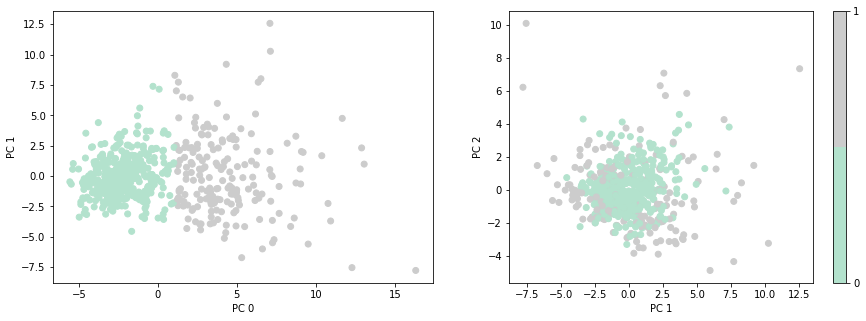

In [26]:
pca_plots(combined_df, 'k2')

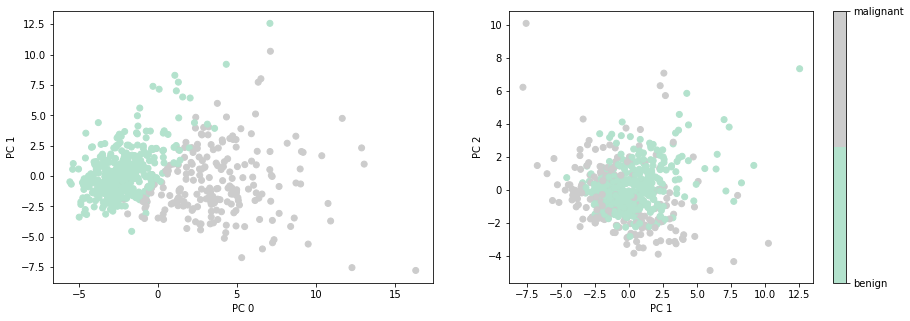

In [27]:
pca_plots(combined_df, 'label')

Notice how the data's been partitioned into two clusters of samples that are close to one another? Also notice how in our particular dataset, clustering with k = 2 nicely partitions data into 2 groups separated perfectly in the space of PC 0 and PC 1?

Let's try k = 3:

In [28]:
do_kmeans(combined_df, feats_use = ['0', '1'], k = 3, col_name = 'k3')

combined_df.iloc[:,28:combined_df.shape[1]].head()

,worst symmetry,worst fractal dimension,0,1,2,label,k2,k3
0,0.4601,0.11890,9.192837,1.948583,-1.123166,malignant,1,1
1,0.2750,0.08902,2.387802,-3.768172,-0.529293,malignant,1,1
2,0.3613,0.08758,5.733896,-1.075174,-0.551748,malignant,1,1
3,0.6638,0.17300,7.122953,10.275589,-3.232790,malignant,1,2
4,0.2364,0.07678,3.935302,-1.948072,1.389767,malignant,1,1


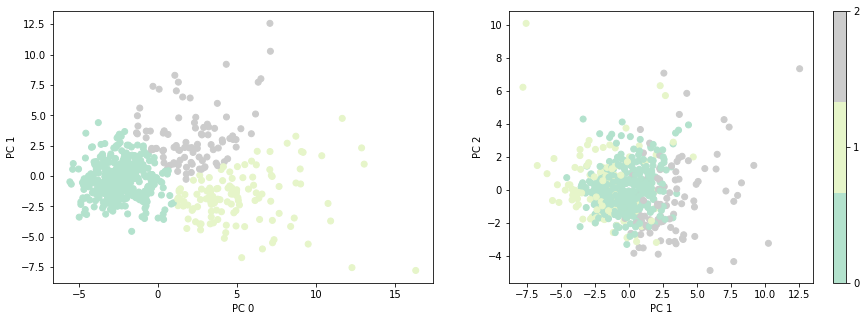

In [29]:
pca_plots(combined_df, 'k3')

Now we have 3 groups of samples that looks close to one another. Also notice that again, separation only happens in PC 0 and PC 1, the variables that were input to kmeans clustering

### Side Notes on Kmeans

Kmeans starts with randomly assigned clusters, and tries to improve cluster assignment in an iterative process. We set a seed for a random number generator which ensures that, given a particular random seed, we get the same clustering result every time. Different start points can result in different solutions. If you really want to be rigorous about checking if the solutions that come out don't vary too much given different start points, you can run kmeans 100-1000 times with different seeds and calculate the similarity of solutions with the [adjusted rand index](https://en.wikipedia.org/wiki/Rand_index#Adjusted_Rand_index).

Kmeans works best if data is distributed roughly spherically, i.e. the density of points emanating from the center of a given group doesn't change that much depending on the direction outward from the center of the cluster. Kmeans also doesn't work well when groups of samples have a curved distribution. Examples of how violations of this assumption can lead to bad clustering are given [here](https://scikit-learn.org/stable/modules/clustering.html)

#### Choosing the number of clusters

The question then arises: How many clusters is the best number? If we choose too few, we might not be capturing all of the cool structure in the data. 

We can use the silhouette score, which compares the the distance between samples in the same cluster to samples in the nearest cluster (more on the silhouette score [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).  Ideally, we want to maximize this score across all clusters, so we'll take the average silhouette score across all samples and make this the function we want to maximize.

Let's see both the clusters that come out and the resulting scores


Text(0, 0.5, 'silhouette score')

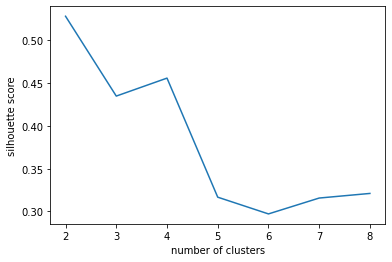

In [30]:
from sklearn import metrics

def silhouette_analysis(df, feats_use = ['0', '1'], k_use = np.arange(2,9)):
    # copy dataframe and do not modify input
    df_copy = df.copy()
    mean_silhouette_scores = []
    for k in k_use:
        col_name = 'k' + str(k)
        do_kmeans(df_copy, feats_use = feats_use, k = k, col_name = col_name)
        input_data = df_copy[feats_use].to_numpy().astype('float64')
        clust_labs = df_copy[col_name]
        dist_mat = metrics.pairwise.euclidean_distances(input_data)
        s_mean = metrics.silhouette_score(dist_mat, clust_labs)
        mean_silhouette_scores.append(s_mean)
    return(mean_silhouette_scores)

s_scores = silhouette_analysis(combined_df)
plt.plot(np.arange(2,9), s_scores)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')

As we can see, and perhaps unsurprisingly, 2 clusters gives the best separation of datapoints into clusters

## Summary:

We did an initial data exploration of a breast cancer dataset with PCA, and learned how clustering can automatically group similar samples together. Now it's your turn to apply what you've learned to your own data and see if you can find any cool insights!